In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
# cols =['DateStart','AdsetId','LinkClick','Conversions','Impressions','Spend']
# data = pd.read_csv('RagingBull_FB_Hourly.csv', usecols=cols)
# data.to_csv('Final_Set')
# data.fillna(0,inplace=True)

In [178]:
data = pd.read_csv('Final_Set')
data.fillna(0, inplace= True)

In [179]:
data['CTR'] = (data['LinkClick']/data['Impressions']).replace([np.inf, -np.inf], 0)

In [180]:
data.head()

,Unnamed: 0,Spend,DateStart,LinkClick,Impressions,AdsetId,Conversions,CTR
0,0,1.58,2018-07-12,0.0,27.0,6094650899637,0.0,0.0
1,1,0.02,2018-05-18,0.0,3.0,6093425908037,0.0,0.0
2,2,0.02,2018-05-26,0.0,2.0,6093224252437,0.0,0.0
3,3,0.04,2018-06-07,0.0,7.0,6094650898437,0.0,0.0
4,4,0.04,2018-06-04,0.0,2.0,6095173565837,0.0,0.0


In [181]:
data_total_IPS = pd.pivot_table(data = data, values= ['Spend','Impressions'], fill_value= 0, index='AdsetId',aggfunc='sum')

In [182]:
data_total_IPS['IPS'] = (data_total_IPS['Impressions']/ data_total_IPS['Spend']).replace([np.inf, -np.inf], 0)

In [183]:
data_total_IPS.drop(['Impressions','Spend'], axis=1, inplace=True)

In [184]:
ads_IPS = data_total_IPS.values

In [185]:
data_total_CTR = pd.pivot_table(data = data, values= ['LinkClick','Impressions'], fill_value= 0, index='AdsetId',aggfunc='sum')

In [186]:
data_total_CTR['CTR_agg'] = (data_total_CTR['LinkClick']/data_total_CTR['Impressions']).replace([np.inf, -np.inf], 0)
data_total_CTR.drop(['LinkClick','Impressions'],inplace = True, axis = 1)
data_first_row = pd.pivot_table(data = data_total_CTR, values= ['CTR_agg'],columns='AdsetId').replace([np.inf, -np.inf], 0)

In [187]:
data_total_CTR.head()

,CTR_agg
AdsetId,
6082903610237,0.013802
6082903612037,0.013670
6082903614437,0.010551
6082903615637,0.009154
6082903618837,0.012005


In [188]:
data = data.join(data_total_CTR, on = ['AdsetId'])

In [189]:
data = data[data['CTR_agg'] > 0]

In [190]:
data.drop(['CTR_agg'], inplace= True, axis = 1)

In [191]:
data.head()

,Unnamed: 0,Spend,DateStart,LinkClick,Impressions,AdsetId,Conversions,CTR
0,0,1.58,2018-07-12,0.0,27.0,6094650899637,0.0,0.0
1,1,0.02,2018-05-18,0.0,3.0,6093425908037,0.0,0.0
2,2,0.02,2018-05-26,0.0,2.0,6093224252437,0.0,0.0
3,3,0.04,2018-06-07,0.0,7.0,6094650898437,0.0,0.0
4,4,0.04,2018-06-04,0.0,2.0,6095173565837,0.0,0.0


In [192]:
data.shape

(438872, 8)

In [193]:
len(set(data['AdsetId']))

242

In [194]:
opt_data = (data[['DateStart','AdsetId','CTR']].copy(deep = True))

In [195]:
data_final = pd.pivot_table(data=opt_data, values= 'CTR', columns='AdsetId',fill_value= 0,index='DateStart',aggfunc='sum').reset_index()
data_final.drop('DateStart',inplace= True, axis=1)
data_final.shape

(130, 242)

In [196]:
# data_initial_set = pd.pivot_table(data = data, values= ['LinkClick','conversions'], fill_value= 0, index='id',aggfunc='sum')

In [197]:
# data_initial_set['TotalClicksperConversion'] = (data_initial_set['LinkClick']/data_initial_set['Conversions']).replace([np.inf, -np.inf,np.NAN], 0)

In [198]:
# data_initial_set = pd.pivot_table(data = data_initial_set, columns= 'id', values= 'TotalClicksperConversion', fill_value= 0).reset_index()

In [199]:
# data_initial_set.drop('index',inplace= True,axis =1)

In [200]:
# data_initial_set

In [201]:
# import gc
# del opt_data
# # del raw_data
# gc.collect()

In [202]:
len_data_final = data_final.shape[1]
df = pd.DataFrame()
appender = data_first_row.iloc[[0]]
while len_data_final >= 0:
    df = df.append(appender,ignore_index= True)
    len_data_final -= 1
df.shape 

(243, 242)

In [203]:
data_final = df.append(data_final)
data_final.shape

(373, 242)

In [204]:
import random
import math
from collections import defaultdict
N = data_final.shape[0]
d = data_final.shape[1]
Exp = 10 ###Number of experiments
experiment_data = defaultdict()
for exp in range(Exp):
    id_reward_map = defaultdict()
    id_reward_map = {}
    numbers_of_rewards_1 = [0] * d
    numbers_of_rewards_0 = [0] * d
    sums_of_rewards = [0] * d
    total_reward = 0
    reward = 0
    for key, value in enumerate(data_final.columns):
        id_reward_map[key] = [0, value, 0]

    for n in range(0, N):
        ad = 0
        max_random = 0
        for i in range(0, d):
            random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    #         print("Ad id {}  Max random .{}  Random beta .{}".format(i, max_random, random_beta))
    #         print("".format())
            if random_beta > max_random:
                max_random = random_beta
                ad = i
    #             print(ad)
                id_reward_map[ad][0] += 1
        #     print(ads_selected)
                reward = data_final.values[n, ad]
                if reward > 0:
                    numbers_of_rewards_1[ad]+= 1
                    id_reward_map[ad][2]+=reward
                    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
                    total_reward += reward
                else:
                    numbers_of_rewards_0[ad]+= 1
#             print("Reward {}".format(reward))
#             print("Total re")
                
    experiment_data[exp] = {'id_reward_map': id_reward_map, 'total_reward': total_reward}

    #Visualising the results
    # plt.hist(id_reward_map[1])
    # plt.title('Histogram of ads selections')
    # plt.xlabel('Ads')
    # plt.ylabel('Number of times each ad was selected')
    # plt.show()

In [205]:
val = sorted([(value['total_reward'],key) for (key,value) in experiment_data.items()], reverse=True)[:1]
val
total_weights = val[0][0]
experiment_selected = val[0][1]

In [206]:
# Weights_selected = 
ad_weights = defaultdict()
for key, value in experiment_data.items():
    for k,val in value['id_reward_map'].items():
        ad_weights[val[1]] = (val[2], val[2]/total_reward)
        

In [207]:
pd.DataFrame(id_reward_map).to_csv('Reward_Map')

In [208]:
total_weights

309.55734190407725

In [209]:
print(sum(x[1] for x in ad_weights.values()))

1.0


In [210]:
total_reward

231.72854606556027

In [211]:
pd.DataFrame(ad_weights).to_csv('Reward_Map.csv')

In [212]:
import scipy
from scipy.optimize import linprog

In [213]:
ads = []
ads_CTR = []
ad_weight_ratio = []
for key, value in ad_weights.items():
    ads.append(key)
    ads_CTR.append(value[0])
    ad_weight_ratio.append(value[1])

In [214]:
IPS=np.zeros((len(set(data['AdsetId'])),len(set(data['AdsetId']))))
np.fill_diagonal(IPS,ads_IPS*(-1))

In [215]:
budget = np.ones_like(ads_CTR)

In [216]:
A=np.vstack((budget,ad_weight_ratio,IPS))

In [217]:
total_budget = 100000
weight_assign_total = 100000
b = np.hstack((total_budget, weight_assign_total, ([-1000] * len(budget)))).reshape(-1,1)
bounds = [(0, None) for x in range(len(budget))]
c = -1 * data_total_CTR.values.reshape(-1,1)

In [218]:
res = linprog(c,A_ub=A,b_ub=b,bounds=bounds,method='interior-point',options={"disp": True})

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 -97.16176508533     
0.4759525045167     0.4759525045167     0.4759524014251     0.5363781646903  0.4759525045168     -97.20571118221     
0.07260392236112    0.07260392236112    0.07260390960903    0.9376514689664  0.07260392236109    -115.4644285511     
0.0007309910375615  0.0007309910375615  0.0007309908567056  1.0              0.0007309910375613  -829.6220399321     
2.047469097764e-05  2.047469097764e-05  2.047468591323e-05  0.9720150456168  2.047469097763e-05  -1240.262172171     
1.975232867204e-05  1.975232867204e-05  1.975232378586e-05  0.03908327254189 1.975232867203e-05  -2138.816997603     
1.523851642929e-06  1.523851642929e-06  1.523851265231e-06  0.943901662991   1.523851642928e-06  -3743.868561195     
5.928527269285e-10  5.9285272761e-10    5.928524954738e-1

In [219]:
print(sum(list(res.x)))

99999.99999777542


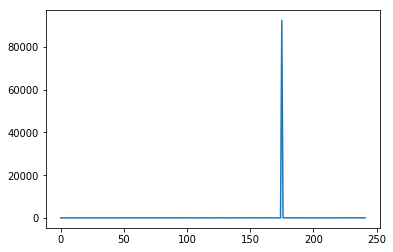

In [220]:
plt.plot(res.x)

In [221]:
ads_weights_matrix = list(zip(ad_weight_ratio, res.x))
ads_allotment = {}
for i in range(len(budget)):
    ads_allotment[i] = {ads[i] : ads_weights_matrix[i]}

temp_dict = {}
for key, values in ads_allotment.items():
    for k, v in values.items():
        temp_dict[k] = v
pd.DataFrame(temp_dict).to_csv('Ads_Allotment')

In [222]:
ad_weight_ratio

[0.020576680494742754,
 0.0010618256060224813,
 4.553335041855021e-05,
 0.0038212497588713044,
 0.0024591764868541087,
 0.0005070690132032365,
 4.11824411370617e-05,
 0.0001486699849979199,
 0.00021889005244984773,
 0.0001097849770496055,
 0.00010426604426167788,
 0.006026745304191918,
 0.022605964175565967,
 0.03510771022765217,
 0.014196743002677311,
 0.10904750422546522,
 0.1663731339336697,
 0.027339554482468446,
 0.012970052461936303,
 0.00013795994376912844,
 0.00022376487594967282,
 0.02198759458463155,
 0.00013668170322764917,
 0.0003547311066172126,
 0.00016225445300447326,
 4.494528544914887e-05,
 0.007866098583537543,
 0.00018061739484392396,
 3.1967031686210534e-05,
 0.24865893751873455,
 0.11134077445257536,
 0.0,
 0.00010884472910315429,
 0.002557423550514262,
 2.7980189757818308e-05,
 0.0001184842311624458,
 0.00703222845729346,
 3.671703983290375e-05,
 4.6324257340467816e-05,
 4.574622718593239e-05,
 3.79366340015299e-05,
 0.000242610201302066,
 1.943576108044598e-05,
 

In [232]:
data_total_IPS.sort_values(by ='IPS', ascending= False)

,IPS
AdsetId,
6095909111037,87.916027
6095652381237,86.738547
23842793654970742,80.307422
6093425908037,77.934740
6095652240237,76.664274
6093225129837,70.689865
23843001951860616,65.652289
6095652303237,64.827836
23842793657500742,64.406889
